In [1]:
import pandas as pd
import numpy as np
import random

In [11]:
import seaborn as sns

In [2]:

city_list = ["New York", "Manchester", "California", "Munich", "Bombay", 
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer", "Test Engineer", 
            "Software Development Engineer-II", "Python Developer", "Back End Developer",
            "Front End Developer", "Data Scientist", "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft", 
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]


In [3]:
data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])

In [4]:
data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary", 
                                   "Employment Status", "Employee Rating"])

In [5]:
data.head()

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
0,Apple,IOS Developer,New York,315000,Intern,1.0
1,Infosys,Software Development Engineer-II,Dubai,867000,Full Time,3.3
2,Microsoft,Data Scientist,New York,261000,Full Time,2.4
3,Amazon,Front End Developer,Manchester,870000,Intern,4.9
4,Amazon,IOS Developer,Dubai,543000,Full Time,4.9


# n-largest values in a series
Say we want to start off by finding the top-n paid roles in this dataset. You can do this using the nlargest() method in Pandas. This method returns the first n rows with the largest values in column(s), ordered in descending order.

Note that nlargest() returns the entire DataFrame, i.e., the function also returns the columns not specified for ordering. However, they are not used to order the DataFrame. The code snippet below depicts the use of nlargest() method on our DataFrame.

In [6]:
n = 6
data.nlargest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
415,Mastercard,Front End Developer,Manchester,999000,Full Time,1.1
28,Uber,Data Scientist,California,998000,Full Time,4.8
380,Google,Test Engineer,New York,998000,Full Time,2.6
567,Uber,Front End Developer,London,998000,Full Time,1.1
577,Uber,Data Scientist,London,996000,Intern,4.4
727,Microsoft,Software Development Engineer,New York,995000,Full Time,1.9


When duplicate values exist, we need to specify which particular row(s) we want in the final output. This is done using the keep argument that can take the following values:

keep = "first": prioritizes the first occurrence.
keep = "last": prioritizes the last occurrence.
keep = "all": Does not drop any duplicates, even if it means selecting more than n items (like in the image above).
It is often mistaken that the nlargest()is precisely equivalent to using the sort_values()method as follows:

In [7]:
data.sort_values("Employee Salary", ascending=False).head(n)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
415,Mastercard,Front End Developer,Manchester,999000,Full Time,1.1
567,Uber,Front End Developer,London,998000,Full Time,1.1
380,Google,Test Engineer,New York,998000,Full Time,2.6
28,Uber,Data Scientist,California,998000,Full Time,4.8
577,Uber,Data Scientist,London,996000,Intern,4.4
727,Microsoft,Software Development Engineer,New York,995000,Full Time,1.9


# n-smallest values in a series
Similar to the nlargest() method discussed above, you can find the rows corresponding to the lowest-n values using the nsmallest() method in Pandas. This method returns the first n rows with the smallest values in column(s), arranged in ascending order. The arguments passed here are the same as those specified in the nlargest() method. The code snippet below depicts the use of nsmallest() method on our DataFrame.

In [8]:
n = 7
data.nsmallest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
153,Wipro,Software Development Engineer-II,London,0,Full Time,0.1
8,Google,Back End Developer,Tokyo,4000,Full Time,4.6
724,Google,Research Engineer,Sydeny,4000,Full Time,4.3
304,Infosys,Android Developer,Bombay,5000,Full Time,4.2
439,IBM,Front End Developer,California,5000,Full Time,4.9
528,Microsoft,Test Engineer,California,5000,Full Time,0.3
201,Apple,Python Developer,Manchester,7000,Full Time,3.4
356,Google,Research Engineer,Dubai,7000,Full Time,4.3


# CrossTabs
Crosstab allows you to compute a cross-tabulation of two (or more) columns/series and returns a frequency of each combination by default. In other words, crosstab() takes one column/list, displays its unique values as indexes, and then takes another column/list and displays its unique values as the column headers. The values in the individual cells are computed using an aggregation function. By default, they indicate the co-occurrence frequency.

Say, for instance, we wish to compute the number of employees working from each location within every company. This can be done as follows:

In [9]:
pd.crosstab(data["Company Name"], data["Employee Work Location"])

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,11,9,9,5,11,7,9,7,5,9
Apple,8,10,7,5,7,11,9,4,6,7
Cognizant,7,12,14,4,14,19,19,10,8,13
Google,11,5,10,9,12,12,14,9,12,12
IBM,8,8,7,9,8,9,6,10,11,10
Infosys,10,6,10,10,16,10,17,10,7,5
Mastercard,10,8,8,14,10,13,13,12,11,15
Microsoft,5,11,11,5,10,15,5,16,6,13
Uber,9,14,7,17,9,9,11,10,12,13


As it can be hard to interpret numerical values in a crosstab (and to make it more visually appealing), we can generate a heatmap from a crosstab shown below as follows:

<AxesSubplot:xlabel='Employee Work Location', ylabel='Company Name'>

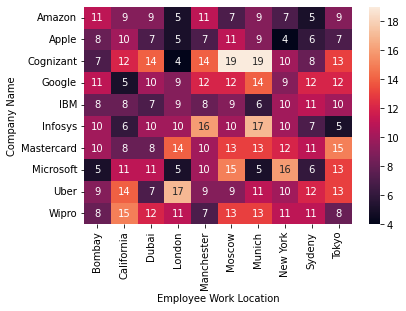

In [12]:
result_crosstab = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result_crosstab, annot=True)

If you wish to compute aggregation on some column other than the ones that make up the indexes and the column headers, you can do so by passing the aggregation column to values argument of crosstab()as shown below:

<AxesSubplot:xlabel='Employment Status', ylabel='Company Name'>

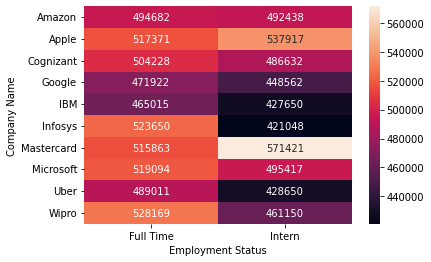

In [13]:
result_crosstab = pd.crosstab(index = data["Company Name"], 
                              columns=data["Employment Status"], 
                              values = data["Employee Salary"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')

# Pivot Table
Pivot tables are a commonly used data analysis tool in Excel. Similar to crosstabs discussed above, pivot tables in Pandas provide a way to cross-tabulate your data.

Although they both share numerous similarities and are conceptually the same in the context of Pandas, there are a few implementational differences that make them different (further reading here). The code snippet below demonstrates the use of pivot_table() method to find the frequency of co-occurrence between the “Company Name” and “Location”:

In [14]:
pd.pivot_table(data, 
               index=["Company Name"], 
               columns=["Employee Work Location"], 
               aggfunc='size', 
               fill_value=0)

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,11,9,9,5,11,7,9,7,5,9
Apple,8,10,7,5,7,11,9,4,6,7
Cognizant,7,12,14,4,14,19,19,10,8,13
Google,11,5,10,9,12,12,14,9,12,12
IBM,8,8,7,9,8,9,6,10,11,10
Infosys,10,6,10,10,16,10,17,10,7,5
Mastercard,10,8,8,14,10,13,13,12,11,15
Microsoft,5,11,11,5,10,15,5,16,6,13
Uber,9,14,7,17,9,9,11,10,12,13


Similar to what we did in Crosstab, we can create a heatmap to make it visually appealing as well as more interpretable. This can be done as shown in the code snippet to generate the following heatmap:

<AxesSubplot:xlabel='Employee Work Location', ylabel='Company Name'>

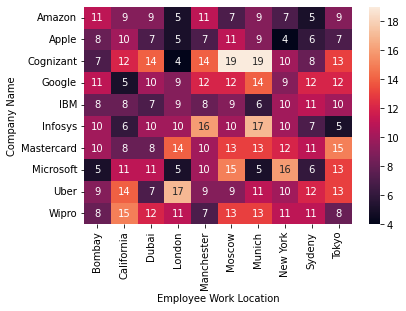

In [15]:
result_pivot = pd.pivot_table(data, 
                              index=["Company Name"], 
                              columns=["Employee Work Location"], 
                              aggfunc='size', 
                              fill_value=0)
               
sns.heatmap(result_pivot, annot = True, fmt = 'g')

# Handling Duplicated Data
In addition to the regular data analysis, appropriately handling duplicate values in your data also plays a vital role in building your data pipeline. One major caveat of having duplicates in your data is that they take up unnecessary storage space and slow down the computation by acquiring resources. Furthermore, duplicate data can skew analysis results, leading us to draw wrong insights. Therefore, removing or handling duplicates in your data is extremely important.

Pandas allows you to assign boolean labels to rows based on all columns (or a subset of columns) which are duplicates. This can be done using the duplicated() method of Pandas as shown below:

```python
new_data.duplicated(keep = "first")
"""
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool
"""
```


When there are duplicate values, keep is used to indicate which specific duplicates to mark.

keep = "first": (Default) Marks all duplicates as True except for the first occurrence.
keep = "last": Marks all duplicates as True except for the last occurrence.
keep = False: Marks all duplicates as True.
You can filter all the rows which appear only once by passing the boolean series as flags for filtering a Pandas DataFrame as follows:

```python
new_data[~new_data.duplicated(keep = False)]
```

To check duplicates on a subset of columns, pass the list of columns as the subset argument of duplicated() method as shown below:

```python
new_data.duplicated(subset=["Company Name", "Employee Work Location"], keep = False)
"""
0    False
1     True
2     True
3    False
4    False
5     True
6     True
7    False
8     True
9     True
dtype: bool
"""
```

[reference1](https://medium.com/towards-data-science/powerful-one-liners-in-pandas-every-data-scientist-should-know-737e721b81b6)
[reference2](https://pandas.pydata.org/docs/)